<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Aikasarja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Jenny')

Päivitetty 2024-03-10 / Jenny


# OSA 1 aikasarjat

In [1]:
# Asennetaan ensin yfinance-kirjasto

!pip install yfinance

In [2]:
# Haetaan pandas -kirjasto
import pandas as pd

# Tuodaan myös tarvittava grafiikka sekä yfinancen
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Valitaan myös tyyli
sns.set_style('whitegrid')

# Haetaan aineisto
> Haetaan kahden pörssiosakkeen kurssihistoria Yahoon Finance -palvelusta osoitteesta https://finance.yahoo.com/.

In [3]:
nordea = yf.download('NDA-FI.HE', start = '2018-01-01')
aktia = yf.download('Aktia.He', start = '2018-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Katsotaan miltä aieistot näyttävät

nordea

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.150,10.190,10.080,10.130,6.283243,1260289
2018-01-03,10.140,10.180,10.070,10.150,6.295648,1560190
2018-01-04,10.170,10.360,10.170,10.310,6.394889,1761646
2018-01-05,10.340,10.340,10.190,10.300,6.388687,1531630
2018-01-08,10.340,10.340,10.200,10.240,6.351471,1670973
...,...,...,...,...,...,...
2024-03-04,11.340,11.366,11.272,11.312,11.312000,3704327
2024-03-05,11.304,11.386,11.230,11.340,11.340000,3495283
2024-03-06,11.386,11.478,11.350,11.406,11.406000,5259934


In [5]:
aktia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,9.11,9.28,9.08,9.13,6.030499,132556
2018-01-03,9.19,9.22,9.13,9.19,6.070129,48758
2018-01-04,9.20,9.35,9.20,9.34,6.169206,45625
2018-01-05,9.36,9.40,9.35,9.37,6.189023,36959
2018-01-08,9.40,9.47,9.37,9.46,6.248469,43533
...,...,...,...,...,...,...
2024-03-04,9.24,9.28,9.22,9.24,9.240000,30954
2024-03-05,9.23,9.25,9.19,9.22,9.220000,29294
2024-03-06,9.22,9.26,9.19,9.23,9.230000,58354


Piiretään kurssikehykset 2018 vuodesta tähän päivään asti. Viivakuviolla havainnoillistetaan osakekurssien arvojen muutokset.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria')

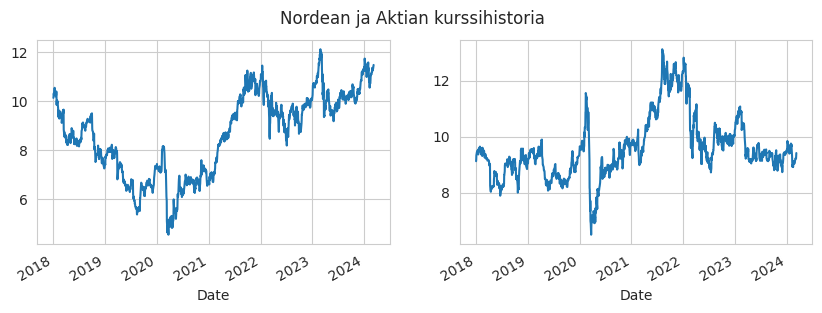

In [6]:
# Luodaan ensin 2 tyhjää pohjaa.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Laitetaan tyhjiin pohjiin valittu aineisto
nordea['Close'].plot(ax=axs[0])
aktia['Close'].plot(ax=axs[1])

# Otsikoidaan
fig.suptitle('Nordean ja Aktian kurssihistoria')

Molemmissa nähtävissä 2020 vuoden alussa alas menevä piikki, kun COVID-19 saapui Suomeen.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

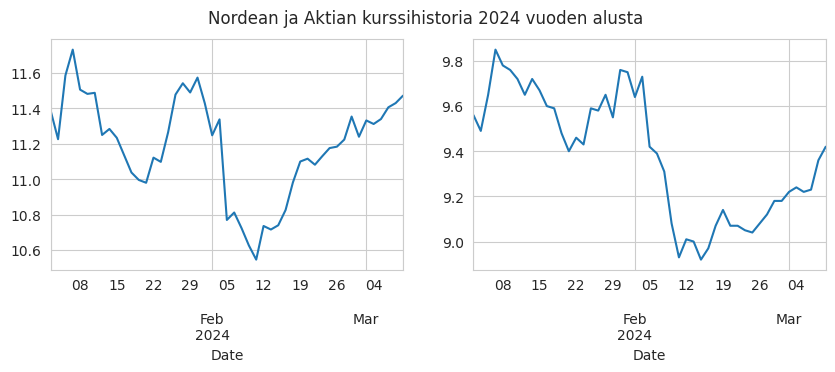

In [7]:
# Katsotaan kurssien kehitys tämän vuoden alusta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2024':].plot(ax=axs[0])
aktia['Close']['2024':].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2018-2020-01')

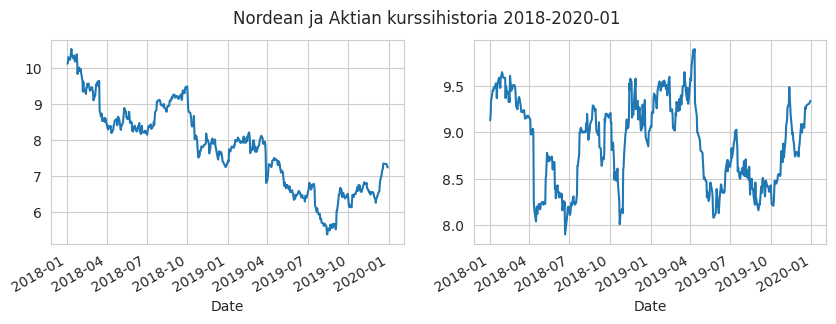

In [8]:
# Katsotaan kurssien kehitys ennen Covid-19
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2018':'2019'].plot(ax=axs[0])
aktia['Close']['2018':'2019'].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2018-2020-01')

Selkiytettään enempi Aggeroinnin avulla käyttäen **resample** -funktiota.

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

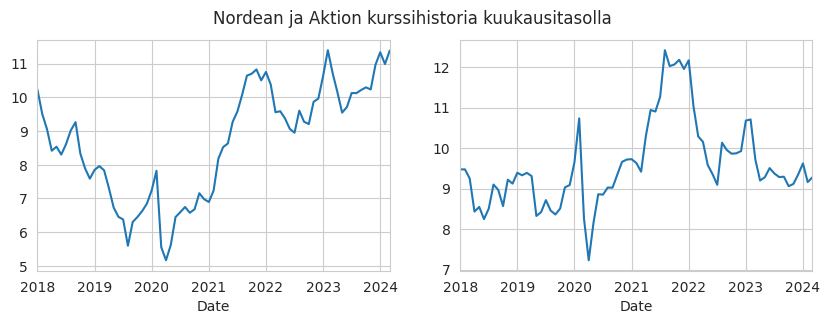

In [9]:
# Aggeroidaan kuukausitasolla
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close'].resample('M').mean().plot(ax=axs[0])
aktia['Close'].resample('M').mean().plot(ax=axs[1])

fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Katsotaan vielä osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

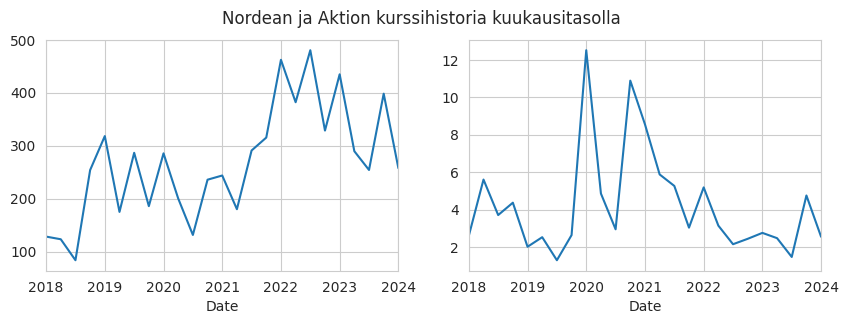

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Selkiytetään viivakuviota jakamalla 1milj. jolloin on helpompi vertailla
(nordea['Volume']/1000000).resample('Q').sum().plot(ax=axs[0])
(aktia['Volume']/1000000).resample('Q').sum().plot(ax=axs[1])

fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Nordealla voluumi ollut suurempaa kuin Aktialla.

## Liukuvat keskiarvot
> Käytetään **rolling** -funktiota tasoittamaan aikasarjojen satunnaisia piikkejä.

<Axes: xlabel='Date'>

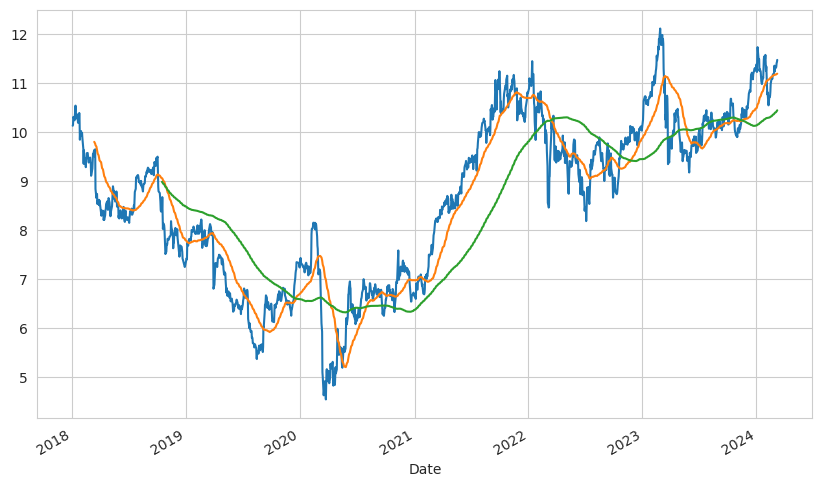

In [11]:
# Nordean päätöskurssien hinnat
nordea['Close'].plot(figsize= (10, 6))

# Nordean päätöskurssien 50 päivän liukuvat keskiarvot
nordea['Close'].rolling(50).mean().plot()

# Nordean päätöskurssien 200 päivän liukuvat keskiarvot
nordea['Close'].rolling(200).mean().plot()

<Axes: xlabel='Date'>

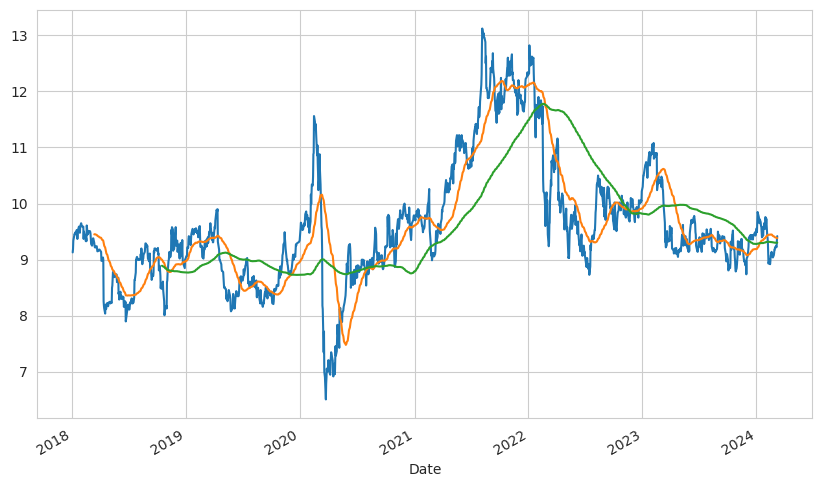

In [12]:
# Aktian päätöskurssien hinnat
aktia['Close'].plot(figsize= (10,6))

# Aktian päätöskurssien 50 päivän liukuvat keskiarvot
aktia['Close'].rolling(50).mean().plot()

# Aktian päätöskurssien 200 päivän liukuvat keskiarvot
aktia['Close'].rolling(200).mean().plot()

## Nordean ja Aktian muutosprosentit

In [15]:
#  Osakekurssien arvon muutokset prosentteina edellisestä kaupanteko päivästä.
nordea['Nordea%'] = nordea['Close'].pct_change()
aktia['Aktia%'] = aktia['Close'].pct_change()

In [19]:
# Muodostetaan uusi aineistoa edellälasketuista muutosprosenteista.
muutos = pd.concat([nordea['Nordea%'], aktia['Aktia%']], axis = 1)

# Jos aineisto sisältää puuttuvia arvoja, joten korvataan arvot nollalla.
muutos = muutos.fillna(0)

muutos

,Nordea%,Aktia%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.001974,0.006572
2018-01-04,0.015764,0.016322
2018-01-05,-0.000970,0.003212
2018-01-08,-0.005825,0.009605
...,...,...
2024-03-04,-0.001765,0.002169
2024-03-05,0.002475,-0.002164
2024-03-06,0.005820,0.001085


<Axes: xlabel='Date'>

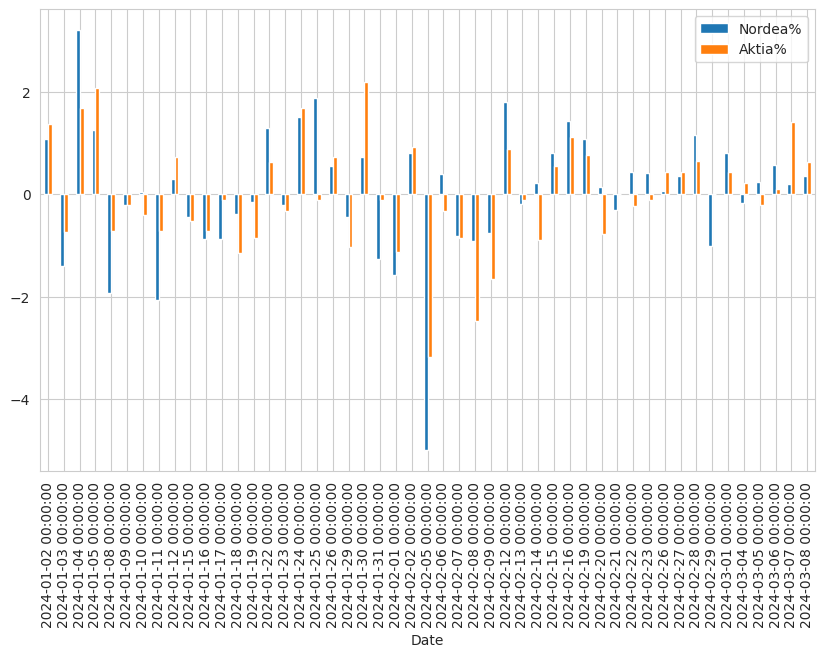

In [21]:
# Tehdään fistogrammin, jossa käydään päivittäiset muutokset läpi.
# Muutetaan prosenteiksi kertomalla 100
(muutos['2024':]*100).plot.bar(figsize = (10, 6))

In [22]:
# Tilastolliset tunnusluvut muutosprosenteille, pyöristettynä 2 descimaalille.
(muutos*100).describe().round(2)

,Nordea%,Aktia%
count,1557.00,1557.00
mean,0.02,0.01
std,1.79,1.54
min,-13.93,-10.89
25%,-0.79,-0.72
50%,0.06,0.00
75%,0.95,0.75
max,8.87,9.29


<Axes: >

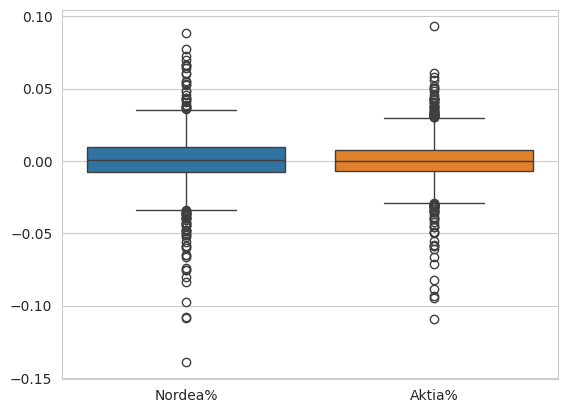

In [23]:
# Graaffisesti

sns.boxplot(data=muutos)

Keskiarvoltaan Nordea ja Aktia tasoissa.

## Muutosprosentten korrelaatio

In [24]:
muutos.corr()

,Nordea%,Aktia%
Nordea%,1.000000,0.471528
Aktia%,0.471528,1.000000


Korrelaatiokerroin 0,47

<Axes: xlabel='Nordea%', ylabel='Aktia%'>

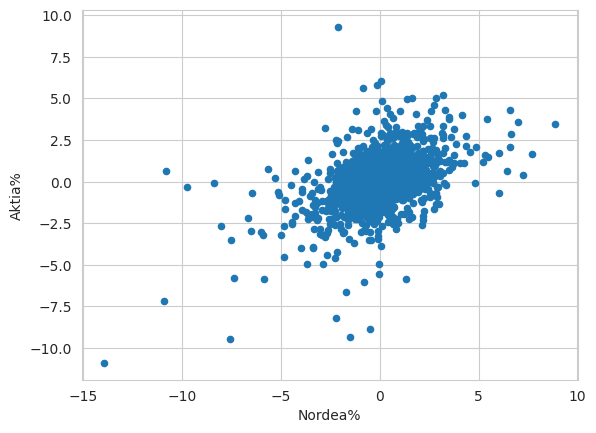

In [25]:
# Graaffisesti

(muutos*100).plot(kind = 'scatter', x = 'Nordea%',  y = 'Aktia%')

Kun Nordean arvo nousee, silloin myös Aktian osake nousee.

<Axes: xlabel='Date'>

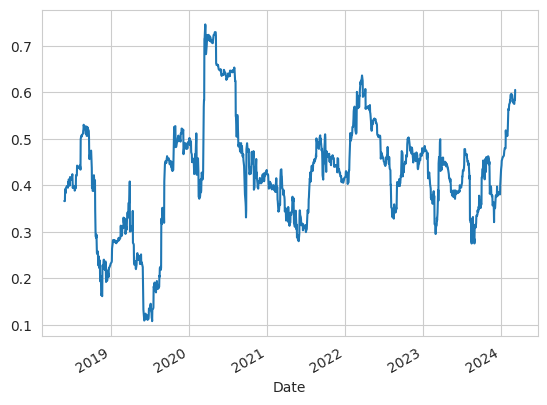

In [26]:
## Liukuva korrelaatioa

muutos['Nordea%'].rolling(100).corr(muutos['Aktia%']).plot()

2019-2020 korrelaatio ollut lähimpänä nollaa, jolloin arvoissa on ollut eniten hajontaa.

# Kahden arvoakselin viivakaavio

Text(0.5, 1.0, 'Nordean ja Aktian osakkeiden päätöskurssien hintakehitys')

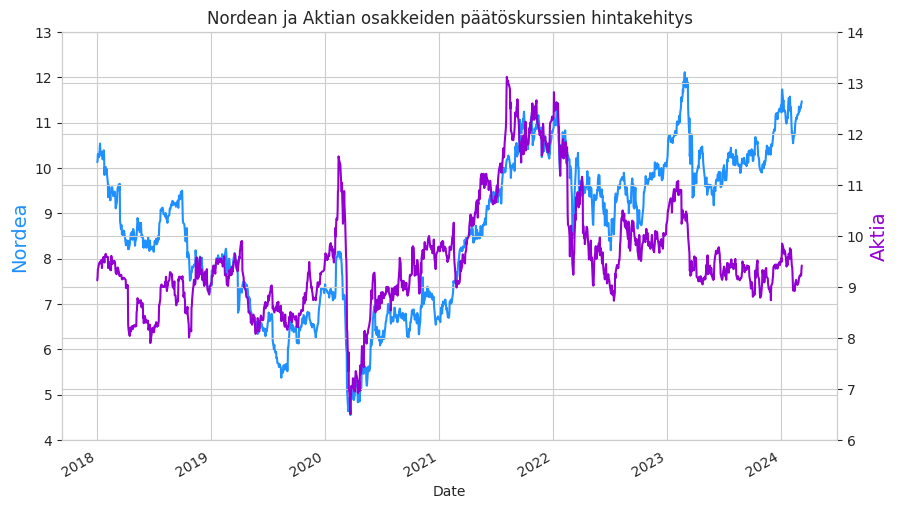

In [40]:
# Tehdä samaan kaavio Nordean ja Aktian päätöshinnat eri suuruusluokissa.

# Tehdään ensin tyhjä kaavio
plt.figure(figsize= (10,6))

# Viivakuvio Nordean päätöshinnoista
nor = nordea['Close'].plot(color= 'dodgerblue')

# Taulukkoon Nordean nimi, väri, fonttikoko
plt.ylabel('Nordea', color = 'dodgerblue', fontsize=14)

# Skaalaan Nordean arvoasteikko
plt.ylim(4, 13)

# Luodaan Aktialle kaavio, jolla on yhteinen vaaka-akseli Nordean kanssa
akt = nor.twinx()

# Viivakuvio Aktian päätöshinnoista

aktia['Close'].plot(ax = akt, color = 'darkviolet')

# Muotoillaan kaavioon Aktian nimi, fonttikoko ja väri
plt.ylabel('Aktia', color = 'darkviolet', fontsize=14)

# Aktian arvoakselin skaalaus
plt.ylim(6, 14)

# Lopuksi vielä annetaan kuviolle otsikko
plt.title('Nordean ja Aktian osakkeiden päätöskurssien hintakehitys')

Nordealla ollut hintakehitystä 2020 vuodesta nykyhetkeen ~ 5€. Aktialla hintakehitys oli nouseva 2020-2022, minkä jälkeen ollut laskua ~ 3€.